# MARKET POSITIONING OF MOBILE USING CLASSIFICATION MODELS 

### ABSTRACT:

An entrepreneur has started his own mobile company. He wants to give
tough fight to big companies like Apple, Samsung etc.
He does not know how to estimate price of mobiles his company creates. In this
competitive mobile phone market, one cannot simply assume things. To solve this
problem, he collects sales data of mobile phones of various companies.
He wants to find out some relation between features of a mobile phone (e.g., RAM,
Internal Memory etc) and its selling price. But he is not so good at Machine Learning.
So, he needs your help to solve this problem.


### PROBLEM STATEMENT:

In [ ]:
Create a classification model to predict whether price range of
mobile based on certain specifications.

#### IMPORTING LIBRARIES

In [102]:
# IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report


In [9]:
# loading dataset
df = pd.read_csv("C:/Users/paval/OneDrive/Documents/mobile_price_range_data.csv")


In [10]:
#Displaying dataset upto 5 rows
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [11]:
#displaying dataset last 5 rows
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [13]:
#shape of dataframe
df.shape

(2000, 21)

In [124]:
#Description of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [14]:
#Displaying data types of the column
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

# checking for null values


In [15]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

# Information of df

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

# statistical description of data

In [17]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


#Displaying histogram for every column w.r.t count 

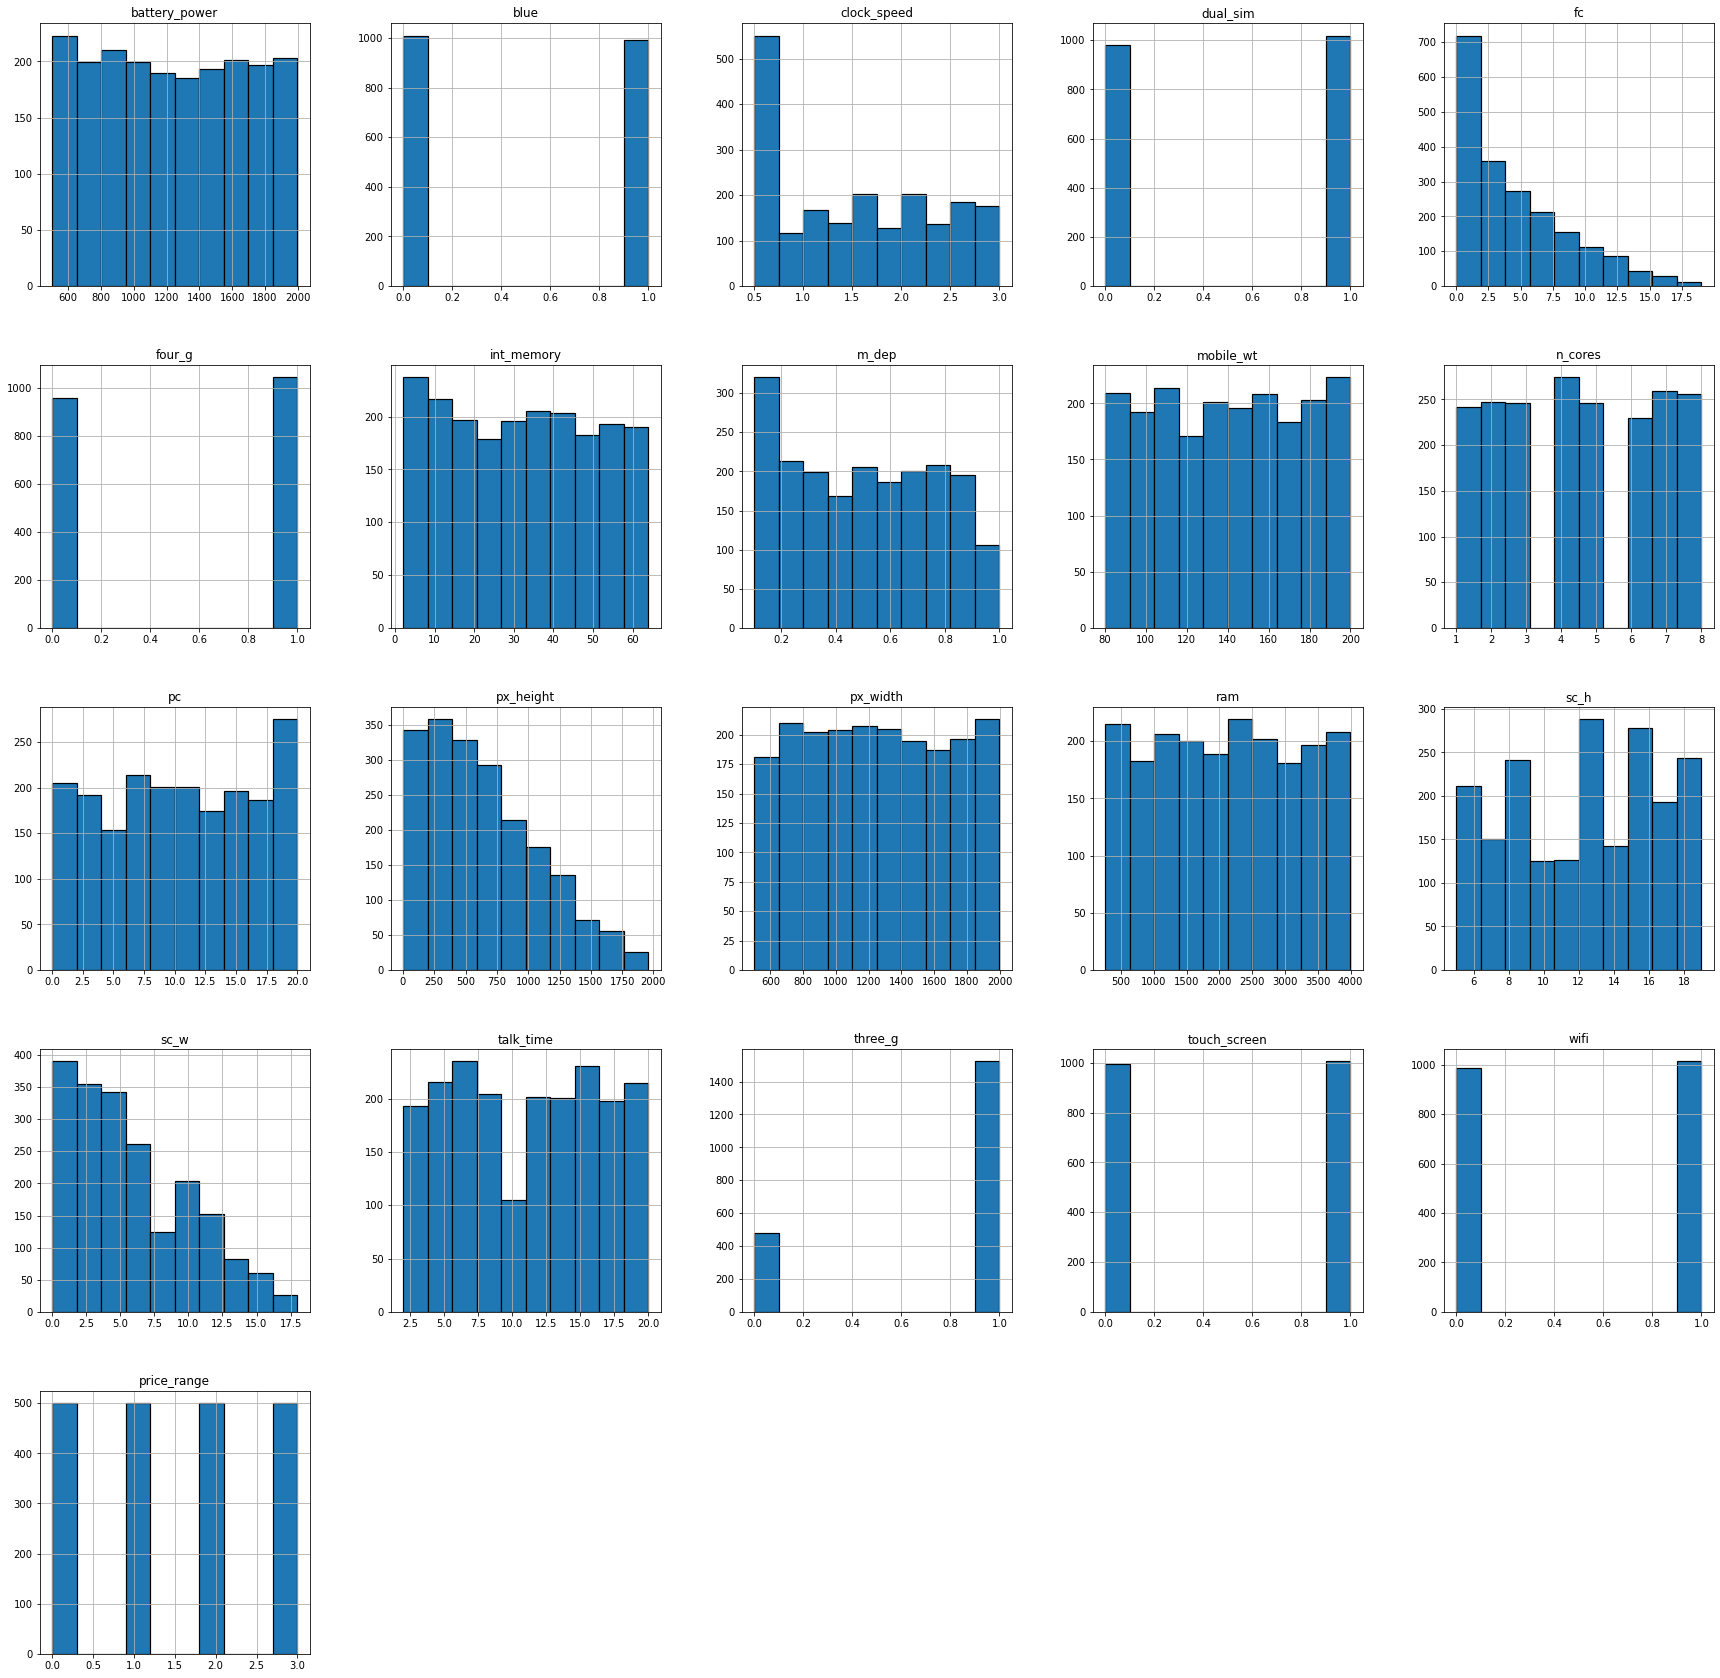

In [25]:
df.hist(edgecolor="black",linewidth=1.2,figsize=(30,30))
plt.show()

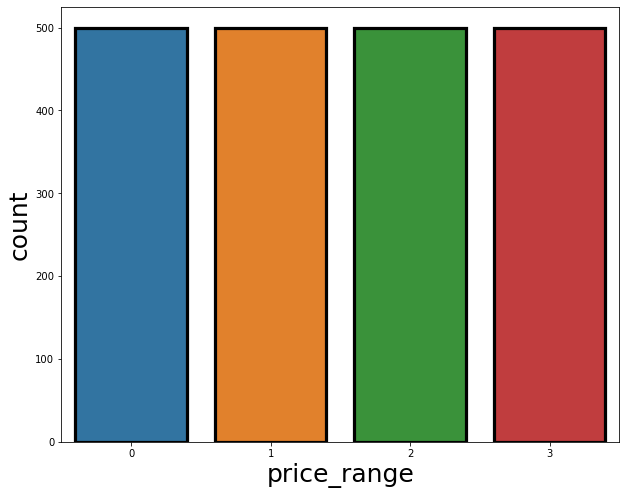

In [89]:
# countplot of price_range column

plt.figure(figsize=(10,8))
ax=sns.countplot(x=df["price_range"],edgecolor="black",linewidth=3.2)
plt.xlabel("price_range",size=25)
plt.ylabel("count",size=25)
plt.show()


### Transforming price range to numeric

In [40]:
Le=LabelEncoder()
df['price_range']=Le.fit_transform(df['price_range'])
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [41]:
#Boxplot of price_range

 ### Ram vs Price Range

Text(0, 0.5, 'ram')

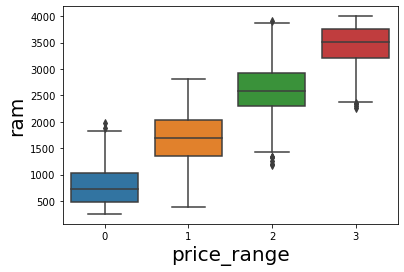

In [72]:
ax=sns.boxplot(x='price_range',y='ram',data=df)
plt.xlabel('price_range',size=20)
plt.ylabel('ram',size=20)

### Battery vs Price Range 

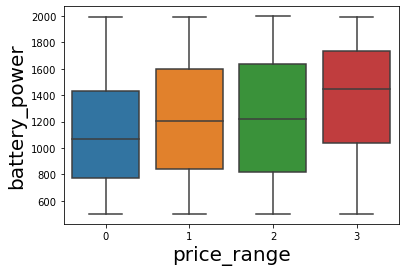

In [70]:
sns.boxplot(y='battery_power',x='price_range',data=df)
plt.xlabel('price_range',size=20)
plt.ylabel('battery_power',size=20)
plt.show()

In [43]:
# correlation matrix

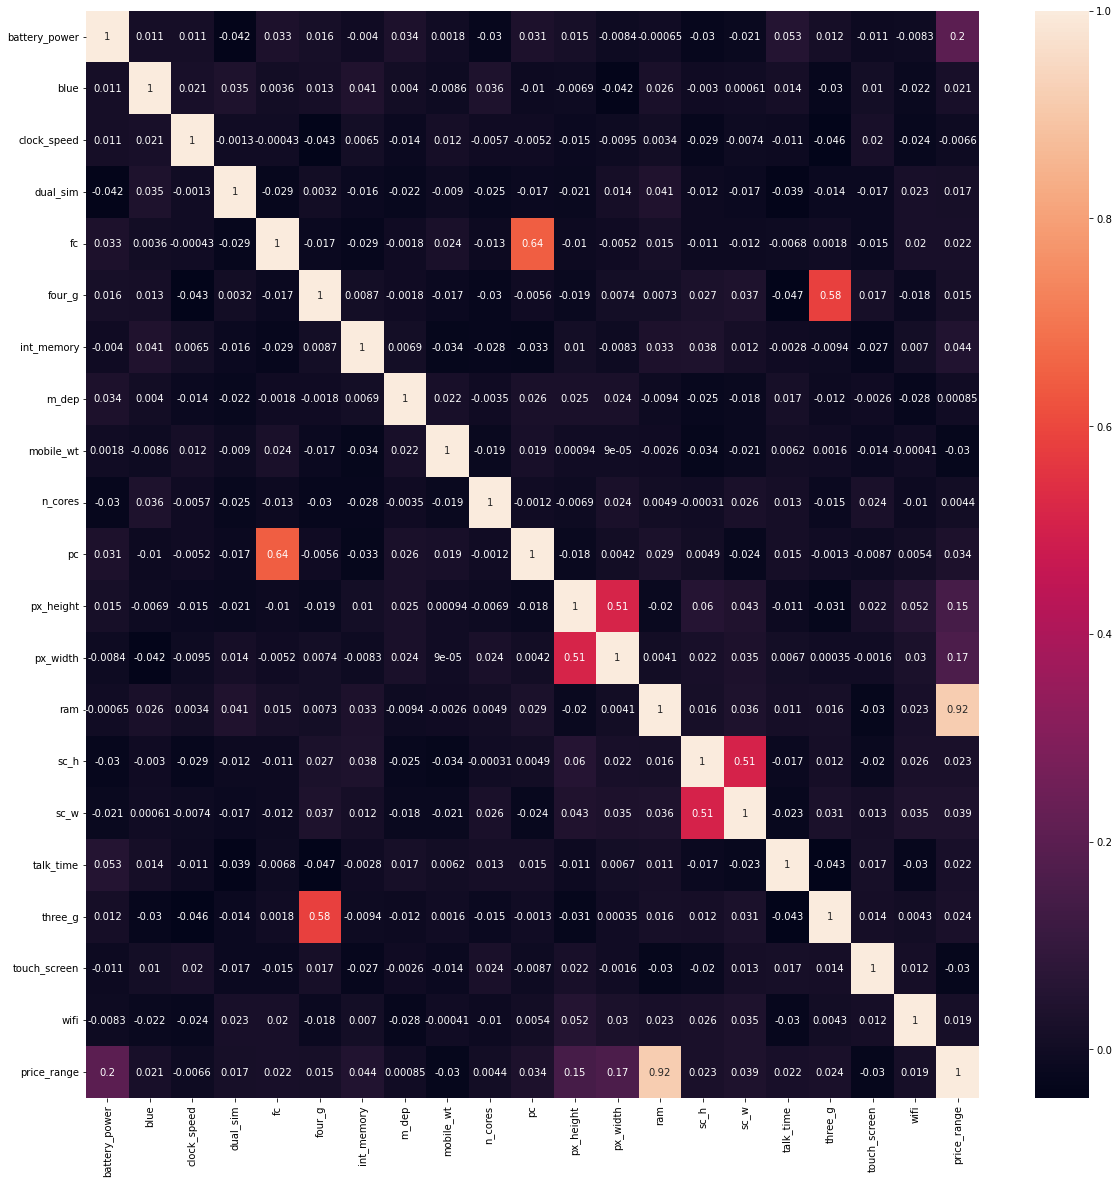

In [47]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

## visualizing price_range with reference to internal memory & ram

C:\Users\paval\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


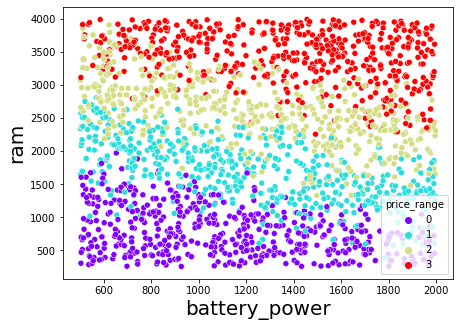

In [65]:
plt.figure(figsize=(7,5))
sns.scatterplot(df['battery_power'],df['ram'],hue=df['price_range'],palette='rainbow')
plt.xlabel('battery_power',size=20)
plt.ylabel('ram',size=20)
plt.show()

# spliting data 

In [74]:
# Assigning all rows of dataframe to the variables x & y
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [75]:
# splitting dataframe into train & test data


x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30)


# shape of the train & test data
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(1400, 20)
(600, 20)
(1400,)
(600,)


# Logistic Regression

### Building the model


In [76]:
m1 = LogisticRegression()
m1.fit(x_train,y_train)

C:\Users\paval\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Predicting class 

In [77]:
y_pred1 = m1.predict(x_test)
print(y_pred1)

[0 0 3 2 1 3 1 0 2 1 3 3 2 1 1 2 1 2 3 2 0 3 2 1 2 1 2 3 1 1 0 0 1 1 2 3 1
 3 2 3 1 3 3 2 1 0 0 2 3 0 3 2 1 3 2 0 3 0 2 1 1 2 2 1 0 3 2 1 0 1 3 1 1 1
 2 2 0 0 3 2 2 0 3 1 3 2 1 2 2 3 1 3 0 0 1 3 0 3 1 3 0 3 1 3 1 0 2 1 1 3 2
 2 1 3 3 1 3 3 1 1 3 0 2 2 3 3 1 1 1 3 1 1 1 0 3 1 1 1 3 3 3 3 2 0 3 3 3 1
 1 3 0 0 2 1 2 3 1 1 3 2 3 2 0 1 1 3 1 3 0 2 1 2 0 1 1 1 1 0 3 1 1 0 1 3 2
 1 0 0 3 3 1 3 2 3 0 0 0 2 2 3 0 0 3 3 3 2 0 1 1 0 0 0 0 2 2 1 0 0 1 2 1 1
 2 0 2 1 3 0 2 3 2 1 3 1 1 1 0 2 1 3 3 3 0 2 0 2 1 2 1 1 0 3 2 3 0 2 1 0 3
 3 1 3 0 2 2 1 0 0 0 1 3 2 1 0 1 2 0 0 3 2 2 2 1 2 2 0 1 2 0 2 2 3 3 0 2 3
 3 3 1 1 0 0 2 0 1 3 1 0 0 0 0 2 1 2 3 3 2 0 1 0 2 1 2 1 3 3 0 3 2 3 0 3 3
 1 0 3 0 2 0 1 1 3 1 0 2 0 0 1 2 1 0 1 0 1 2 0 0 1 0 2 3 3 2 3 3 3 1 2 2 2
 3 2 3 0 3 2 3 2 0 0 1 2 1 0 3 0 3 1 3 1 3 3 1 0 1 1 2 0 0 3 3 0 3 1 0 2 0
 3 2 3 2 1 1 1 2 1 1 0 3 1 3 0 3 3 2 2 1 0 3 0 3 3 2 2 2 0 1 0 1 1 1 0 0 3
 3 2 3 1 2 2 0 0 3 3 0 2 0 2 0 2 1 3 1 3 2 2 3 0 2 3 3 3 3 3 1 3 3 3 2 3 0
 1 2 2 3 1 3 1 1 2 3 3 0 

## Checking the Accuracy 

In [78]:
print('TRAINING SCORE', m1.score(x_train,y_train))
print('TESTING SCORE',m1.score(x_test,y_test))

TRAINING SCORE 0.6414285714285715
TESTING SCORE 0.6416666666666667


## Confusion matrix & Classification report

In [79]:
cm1 = confusion_matrix(y_test,y_pred1)
print("CONFUSION MATRIX : \n", cm1)
cr1 = classification_report(y_test,y_pred1)
print("\n CLASSIFICATION REPORT : \n",cr1)

CONFUSION MATRIX : 
 [[116  30   1   0]
 [ 24  84  27   9]
 [  1  48  66  37]
 [  0   2  36 119]]

 CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.82      0.79      0.81       147
           1       0.51      0.58      0.55       144
           2       0.51      0.43      0.47       152
           3       0.72      0.76      0.74       157

    accuracy                           0.64       600
   macro avg       0.64      0.64      0.64       600
weighted avg       0.64      0.64      0.64       600



## Visualize using seaborn

In [ ]:
plt.figure(figsize=(10,10))
ax=sns.heatmap(pd.DataFrame(cm1),annot=True,cmap='Greens',fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## **K NEAREST NEIGHBOUR CLASSIFICATION**

In [90]:
#Building the model
m2=KNeighborsClassifier(n_neighbors=25)
m2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=25)

In [92]:
#Predicting class
y_pred2 = m2.predict(x_test)
print(y_pred2)

[0 0 3 3 1 2 0 0 2 1 2 2 2 2 2 2 1 2 3 1 0 3 3 0 2 1 2 3 2 2 1 0 1 2 2 3 0
 3 2 2 0 2 3 1 1 0 0 2 2 0 2 2 1 3 1 0 3 0 2 1 1 2 2 1 0 3 2 0 0 0 2 0 0 3
 2 3 0 0 2 3 2 0 2 2 3 3 1 1 2 3 2 3 0 0 1 3 0 1 1 2 0 3 2 3 2 1 3 1 2 3 2
 2 2 3 3 1 3 2 1 0 3 0 2 2 2 3 1 0 2 2 1 3 1 0 3 1 2 1 3 3 2 3 2 0 2 3 3 1
 1 3 0 0 2 0 2 3 1 1 3 3 3 3 0 1 2 3 0 3 0 1 1 1 0 2 1 0 1 0 3 0 2 0 1 3 1
 1 0 0 3 2 2 3 2 3 0 1 1 3 3 3 0 1 2 2 3 1 0 1 1 0 0 0 1 1 3 1 1 0 1 3 2 1
 2 0 3 2 3 0 3 3 3 1 3 1 1 1 1 3 1 3 2 3 0 2 0 3 1 2 2 1 1 3 3 2 0 3 2 0 2
 3 2 3 0 1 0 2 0 0 1 1 2 2 0 0 1 1 0 0 3 1 3 3 1 2 2 0 2 3 0 3 3 3 3 0 3 3
 3 2 2 1 0 0 1 1 1 3 1 0 0 1 0 1 0 1 3 3 2 0 2 0 2 2 3 3 3 1 1 1 3 2 0 3 3
 1 0 3 1 2 0 2 1 1 1 0 2 0 0 0 2 1 0 1 0 1 3 0 0 0 0 3 3 1 2 1 3 3 2 3 3 1
 1 3 3 0 3 2 3 3 0 0 2 2 1 0 2 0 3 1 3 1 3 2 1 1 2 1 2 0 0 3 3 0 2 2 0 2 0
 1 2 3 1 1 0 1 2 1 1 0 2 2 3 0 2 2 2 2 1 1 2 0 2 3 3 1 3 0 1 0 1 1 0 1 0 3
 2 3 3 1 3 3 0 0 3 3 0 1 0 1 0 2 1 3 1 2 2 2 3 0 2 3 3 3 3 2 2 3 1 3 2 2 0
 2 1 1 3 1 3 1 1 2 3 3 0 

In [95]:
#Checking the Accuracy
print('Training score : ',m2.score(x_train,y_train))
print('Testing score : ',m2.score(x_test,y_test))

Training score :  0.9385714285714286
Testing score :  0.9283333333333333


In [96]:
# Confusion Matrix and Classification Report
cm2 = confusion_matrix(y_test,y_pred2)
print("Confusion Matrix : \n" , cm2)
cr2 = classification_report(y_test,y_pred2)
print("\n Classification Report : \n" , cr2)

Confusion Matrix : 
 [[144   3   0   0]
 [  4 134   6   0]
 [  0  11 129  12]
 [  0   0   7 150]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       147
           1       0.91      0.93      0.92       144
           2       0.91      0.85      0.88       152
           3       0.93      0.96      0.94       157

    accuracy                           0.93       600
   macro avg       0.93      0.93      0.93       600
weighted avg       0.93      0.93      0.93       600



# SVM CLASSIFIER WITH LINEAR

In [104]:
#Building the Model
from sklearn.svm import SVC
m3 = SVC(kernel ='linear',C=1)
m3.fit(x_train,y_train)

SVC(C=1, kernel='linear')

In [105]:
#Predicting class
y_pred3 = m3.predict(x_test)
print(y_pred3)

[0 0 3 3 1 2 0 0 2 1 2 2 2 2 2 1 1 2 3 1 0 3 3 0 2 1 2 3 2 2 1 0 1 2 2 3 0
 3 1 2 0 2 3 1 2 0 0 2 3 1 1 2 1 3 1 0 3 0 2 1 1 1 2 1 0 3 2 0 0 0 3 0 0 2
 2 2 0 0 2 3 2 0 2 2 3 3 1 1 2 3 2 3 0 0 1 3 0 1 1 2 0 3 2 3 2 1 3 1 2 3 2
 2 2 3 3 1 3 2 1 0 3 0 2 2 2 3 1 0 2 2 1 3 1 0 3 1 2 2 3 3 2 3 2 0 2 3 3 1
 1 3 0 0 2 0 2 3 1 1 3 3 3 3 0 1 2 3 0 3 0 1 1 1 0 2 1 0 1 0 3 0 2 0 1 3 1
 1 0 0 3 2 2 3 2 3 0 1 1 3 3 3 0 1 2 2 3 2 0 1 1 0 0 0 1 1 2 1 1 0 1 3 2 2
 2 0 3 2 3 0 2 3 3 1 3 1 1 1 0 3 2 3 2 3 0 2 0 3 1 2 2 1 1 3 3 3 0 3 2 0 2
 3 2 3 0 1 1 2 0 0 1 1 2 2 0 0 1 1 0 0 3 1 3 3 2 2 2 0 2 2 0 3 3 3 3 0 2 3
 3 3 2 1 0 0 1 1 1 3 1 0 0 0 0 1 0 1 3 3 2 0 1 0 2 2 2 3 3 2 1 1 2 2 0 3 3
 1 0 3 1 2 0 2 1 1 1 0 2 0 0 0 2 1 0 1 0 1 2 0 0 0 0 3 3 1 2 2 3 3 2 3 3 1
 1 3 3 0 3 2 3 3 0 0 2 2 1 0 2 0 3 1 3 1 3 2 1 1 2 1 2 0 0 3 3 0 2 2 0 2 0
 1 2 3 1 1 0 1 2 1 1 0 2 2 3 0 3 2 2 2 1 1 2 0 2 3 3 1 3 0 1 1 1 1 0 1 0 3
 2 3 3 1 3 3 0 0 3 3 0 1 0 1 0 2 1 3 1 2 1 2 3 0 2 3 2 3 3 2 2 3 1 3 2 2 0
 2 1 1 3 1 3 1 1 2 3 3 0 

In [106]:
#Checking the Accuracy
print("Training Score :" ,m3.score(x_train,y_train))
print("Testing Score : ",m3.score(x_test,y_test))

Training Score : 0.9928571428571429
Testing Score :  0.9816666666666667


In [107]:
# Confusion Matrix and Classification Report
cm3 = confusion_matrix(y_test,y_pred3)
print("Confusion Matrix : \n" , cm3)
cr3 = classification_report(y_test,y_pred3)
print("Classification Report : \n" ,cr3)

Confusion Matrix : 
 [[145   2   0   0]
 [  1 142   1   0]
 [  0   5 147   0]
 [  0   0   2 155]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       147
           1       0.95      0.99      0.97       144
           2       0.98      0.97      0.97       152
           3       1.00      0.99      0.99       157

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600



##  SVM CLASSIFIER WITH  RBF KERNEL

In [120]:
#Building the Model
m4 = SVC(kernel ='rbf',gamma=0.001,C=10)
m4.fit(x_train,y_train)

SVC(C=10, gamma=0.001)

In [121]:
#Predicting class
y_pred4 = m4.predict(x_test)
print(y_pred4)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [122]:
#Checking the Accuracy
print("Training score : " ,m4.score(x_train,y_train))
print("Testing score : ", m4.score(x_test,y_test))

Training score :  1.0
Testing score :  0.24166666666666667


In [123]:
# Confusion Matrix and Classification Report
cm4 = confusion_matrix(y_test,y_pred4)
print("Confusion Matrix : /n",cm4)
cr4 = classification_report(y_test,y_pred4)
print("Classification Report : /n",cr4)

Confusion Matrix : /n [[  0 147   0   0]
 [  0 144   0   0]
 [  0 151   1   0]
 [  0 157   0   0]]
Classification Report : /n               precision    recall  f1-score   support

           0       0.00      0.00      0.00       147
           1       0.24      1.00      0.39       144
           2       1.00      0.01      0.01       152
           3       0.00      0.00      0.00       157

    accuracy                           0.24       600
   macro avg       0.31      0.25      0.10       600
weighted avg       0.31      0.24      0.10       600



C:\Users\paval\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\paval\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\paval\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## The Model with Best Accuracy is  Linear SVM with accuracy of 98% .